# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing  libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Autocorrelations
#### &. Stationarizing the Data

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm #
import os
import warnings 
warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
quandl.ApiConfig.api_key = '5Vsdeoc6DJM5KY1jA1HB'

In [3]:
data = quandl.get('MULTPL/SP500_DIV_YIELD_MONTH')

In [4]:
data.head(5)

,Value
Date,
1871-01-31,5.86
1871-02-28,5.78
1871-03-31,5.64
1871-04-30,5.49
1871-05-31,5.35


In [5]:
data.shape

(1862, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

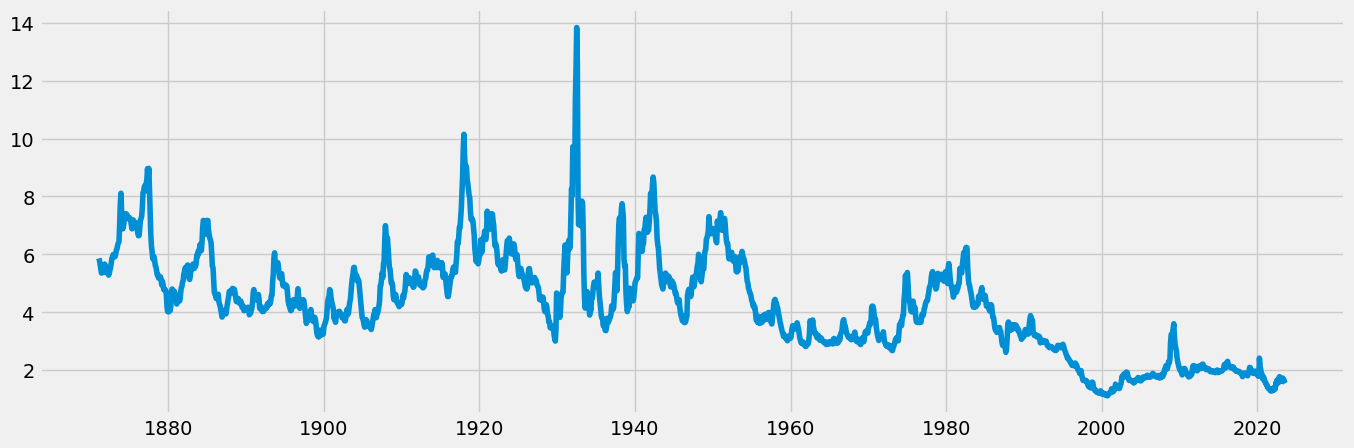

In [8]:
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data)

### 2. Subsetting, wrangling, and cleaning time-series data

**resetting index so we can filter by Date**

In [9]:
data_2 = data.reset_index()

In [10]:
data_2.head()

,Date,Value
0,1871-01-31,5.86
1,1871-02-28,5.78
2,1871-03-31,5.64
3,1871-04-30,5.49
4,1871-05-31,5.35


In [11]:
data_2.shape

(1862, 2)

In [12]:
data_2.head()

,Date,Value
0,1871-01-31,5.86
1,1871-02-28,5.78
2,1871-03-31,5.64
3,1871-04-30,5.49
4,1871-05-31,5.35


**use the column Date as the index**

In [13]:
from datetime import datetime

data_2['datetime'] = pd.to_datetime(data_2['Date']) 
data_2 = data_2.set_index('datetime')
data_2.drop(['Date'], axis=1, inplace=True) 
data_2.head()

,Value
datetime,
1871-01-31,5.86
1871-02-28,5.78
1871-03-31,5.64
1871-04-30,5.49
1871-05-31,5.35


**plotting the dataset**

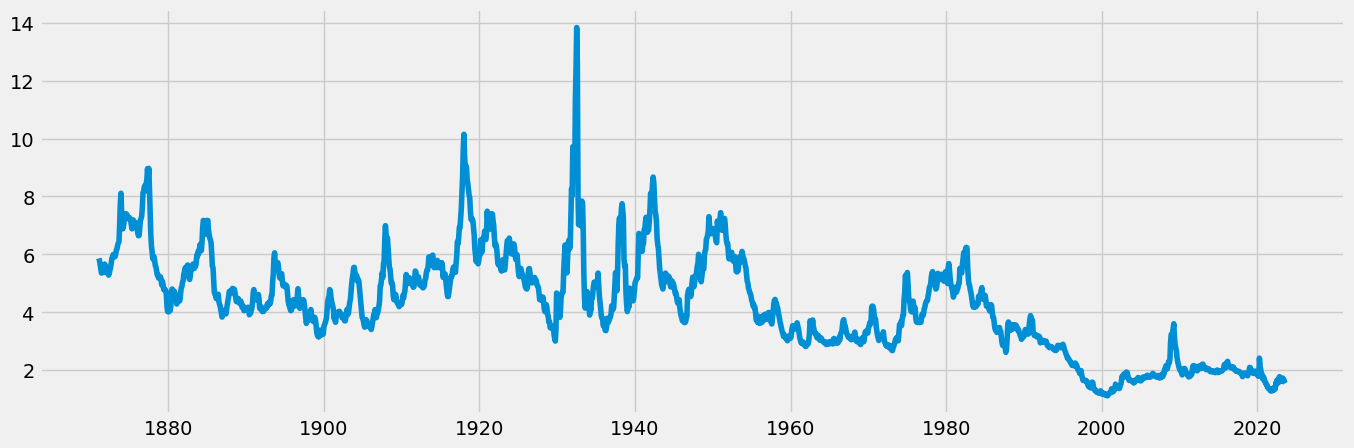

In [15]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_2)

**checking for missing values**

In [17]:
data_2.isnull().sum() 

Value    0
dtype: int64

### 3. Time-series analysis: decomposition

**additive model to decompose series**

In [18]:
decomposition=sm.tsa.seasonal_decompose(data_2, model='additive',period=20)

In [19]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

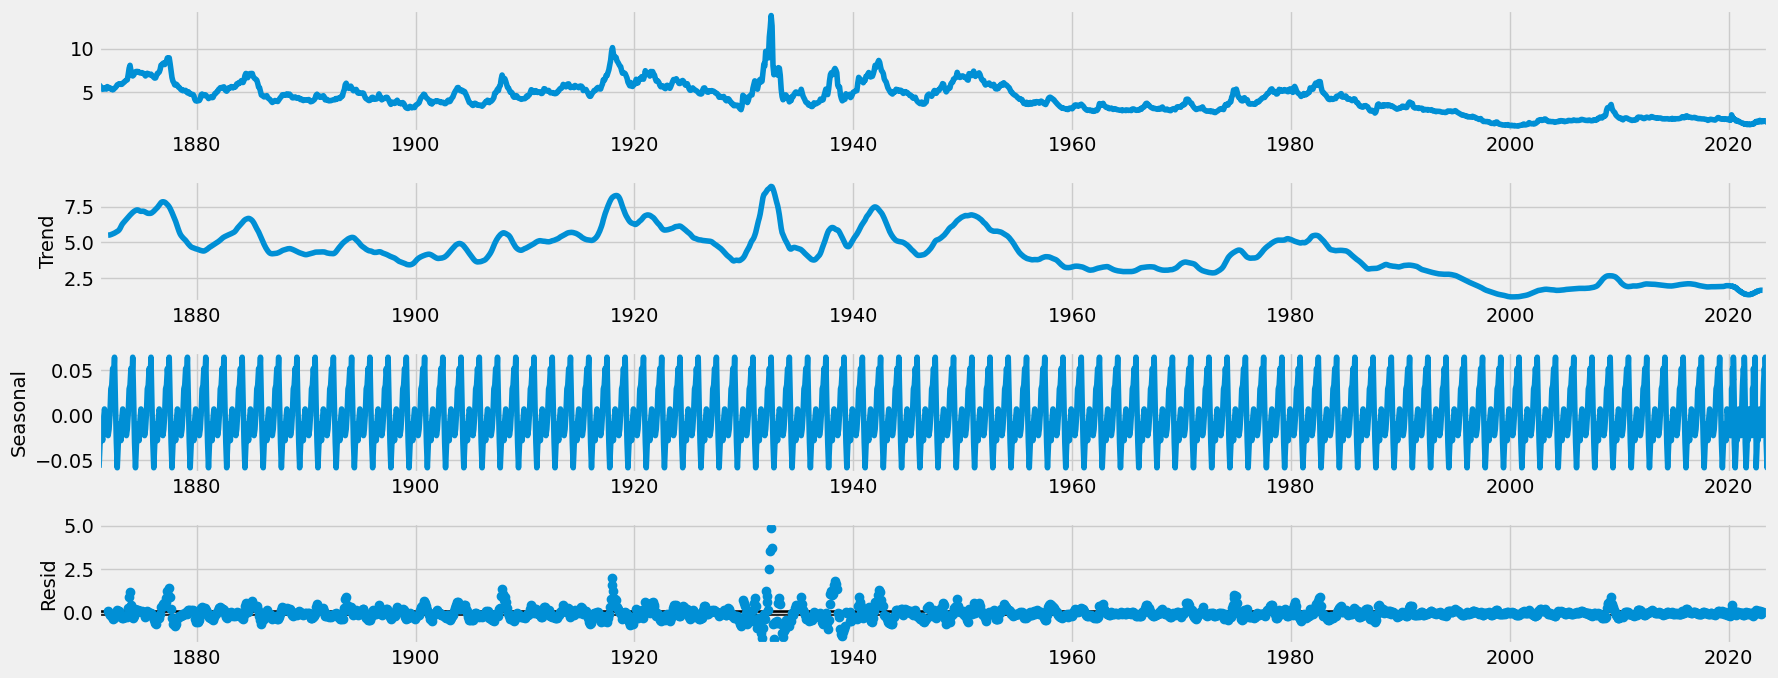

In [20]:
decomposition.plot()
plt.show()

**Comment: level and trends are quite similar, since in the data we do not have much noise.**

**Apart from the increase in 2009, likely due to the global financial crisis, the overall trend is stable.**

**We have a certain amount of seasonality, which impacts similarly each one of the years observed**

**The last part represent the noise wich, as previously observed, is minimal.**

### 4. Testing for stationarity

**Perform the Dickey-Fuller test:**

**importing the function**

In [23]:
from statsmodels.tsa.stattools import adfuller

**defining the funciotn, perform test and apply test to time series**

**Null-hypothesis=there is a unit root**

In [25]:
def dickey_fuller(timeseries): 
   
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)


dickey_fuller(data_2['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   -2.678925
p-value                           0.077757
Number of Lags Used              21.000000
Number of Observations Used    1840.000000
Critical Value (1%)              -3.433909
Critical Value (5%)              -2.863112
Critical Value (10%)             -2.567607
dtype: float64


**Comment: critical value (5%)” is -2.863112. This is larger than the test statistic (-2.678925)
which means that we can reject the null hypothesis;there is no unit root and that the data is stationary.**

### 5. Autocorrelations

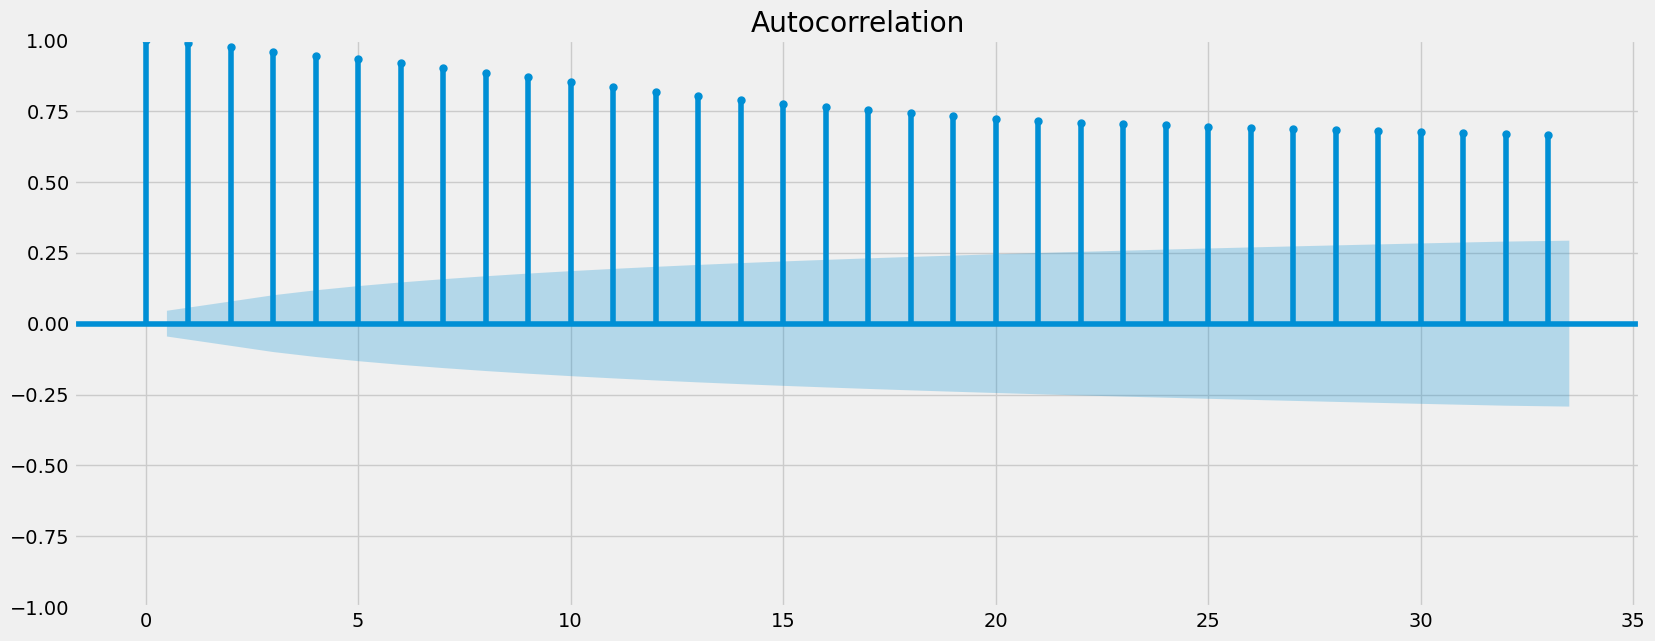

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_2)
plt.show()

**We have too many lags are correlated with each other, indicating the data is non-stationary. This differs from what checked before with the Dick-Fulley test.**

### 6. Stationarizing data

In [30]:
data_diff = data_2 - data_2.shift(1)

In [31]:
data_diff.dropna(inplace = True)

In [32]:
data_diff.head()

,Value
datetime,
1871-02-28,-0.08
1871-03-31,-0.14
1871-04-30,-0.15
1871-05-31,-0.14
1871-06-30,0.04


**comparing the curves before and after**

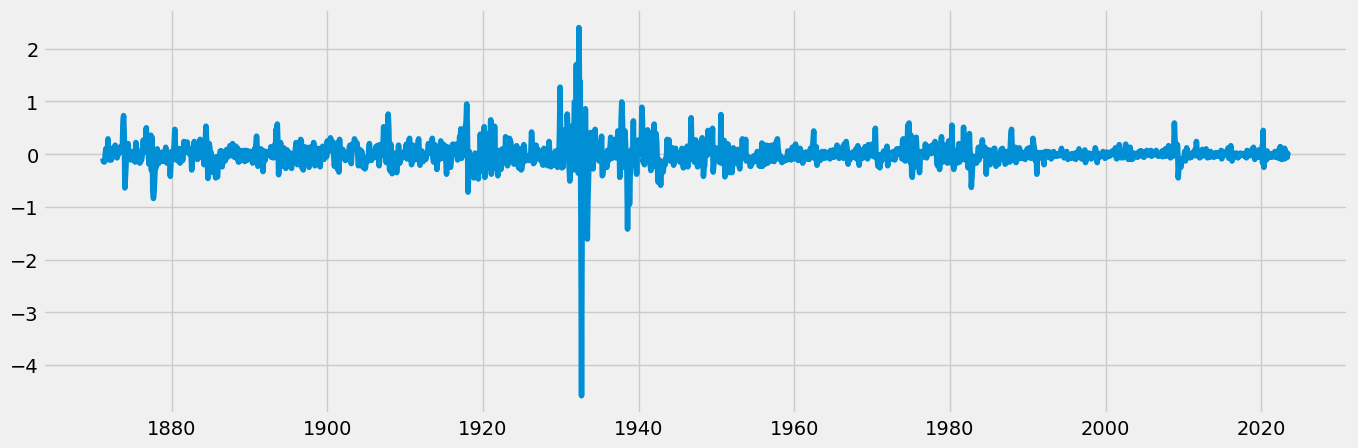

In [33]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [34]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.197435e+01
p-value                        3.832754e-22
Number of Lags Used            2.000000e+01
Number of Observations Used    1.840000e+03
Critical Value (1%)           -3.433909e+00
Critical Value (5%)           -2.863112e+00
Critical Value (10%)          -2.567607e+00
dtype: float64


**Comment: critical value (5%)” is still larger than the test statistic.**
 **There is no unit root and that the data is stationary.**

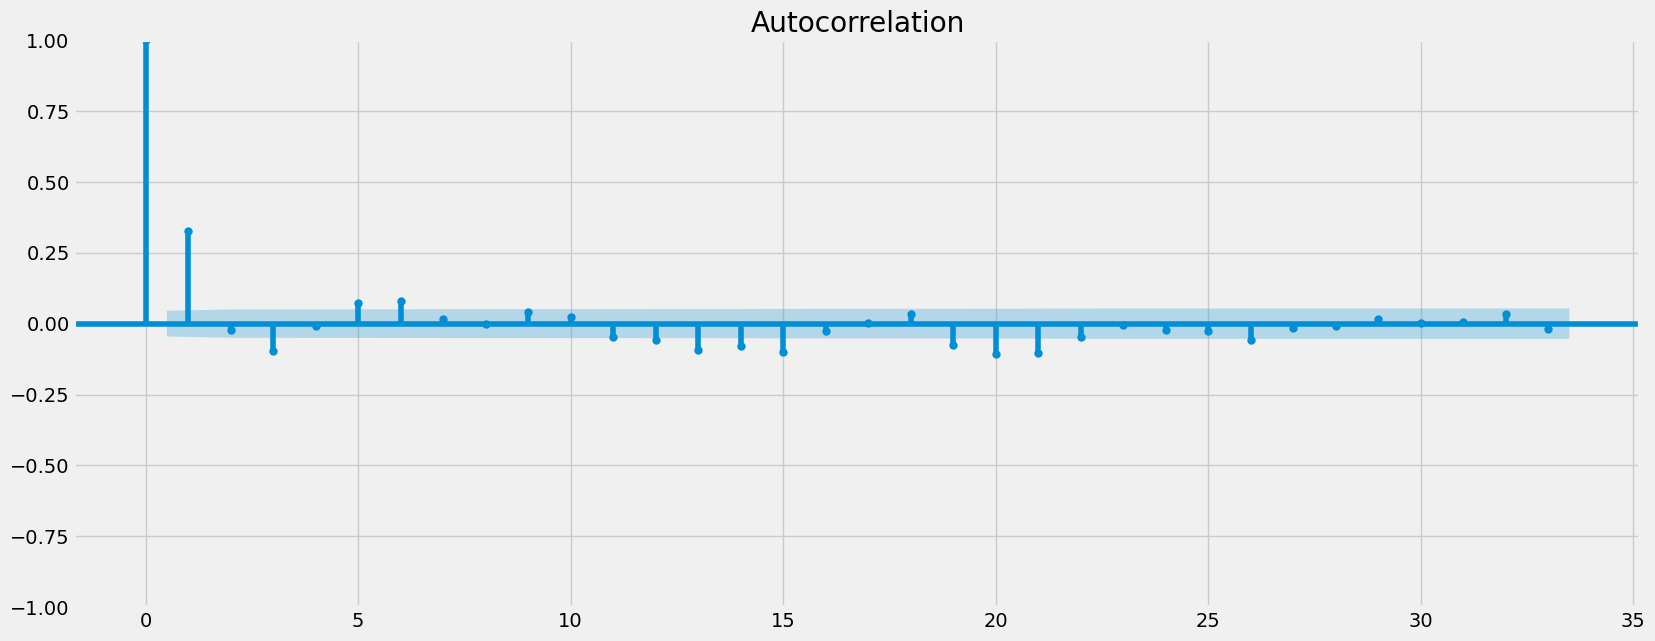

In [36]:
plot_acf(data_diff)
plt.show()

**Comment: plot has way less autocorrelated terms 
More differencing is not necessary as we have less than 10 lags.**